<a href="https://colab.research.google.com/github/phuongghj123/CS114.K21/blob/master/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lấy dữ liệu xuống sử dụng thư viện Pandas
Sử dụng hàm read_csv

In [0]:
import pandas as pd

dataset = pd.read_csv("http://cs.uit.edu.vn/data2.txt", delimiter = ",")
dataset.columns = ["Input size", "Time"]

In [2]:
dataset.head()

,Input size,Time
0,1954367,0.152648
1,3734185,0.298548
2,5839301,0.460480
3,6343427,0.527977
4,1355574,0.098012


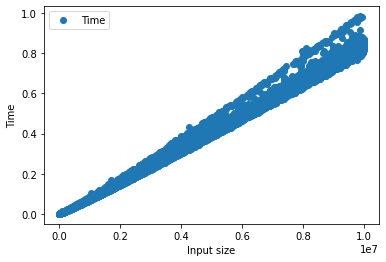

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

dataset.plot(kind = 'line', x = 'Input size', y = 'Time', style = 'o')
plt.xlabel('Input size')
plt.ylabel('Time')
plt.show()

Đưa dữ liệu về ma trận cột

In [0]:
X = dataset['Input size'].values.reshape(-1,1)
Y = dataset['Time'].values.reshape(-1,1)

Chọn model bằng cách import model từ thư viện sklearn
Lấy 80% dữ liệu trong bộ dữ liệu để training data

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression(fit_intercept=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [13]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Sử dụng hàm predict để dự đoán cho X_train và X_test

In [0]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

Đưa ra kết quả so sánh giữa giá trị y cho trước và giá trị y dự đoán

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_prediction.flatten()})
df

,Actual,Predicted
0,0.570774,0.597697
1,0.802524,0.785349
2,0.474871,0.473127
3,0.628161,0.644571
4,0.271944,0.276631
...,...,...
14218,0.224367,0.230885
14219,0.179694,0.186565
14220,0.201181,0.200866
14221,0.169127,0.175531


Biểu đồ so sánh giá trị y cho trước và giá trị y dự đoán

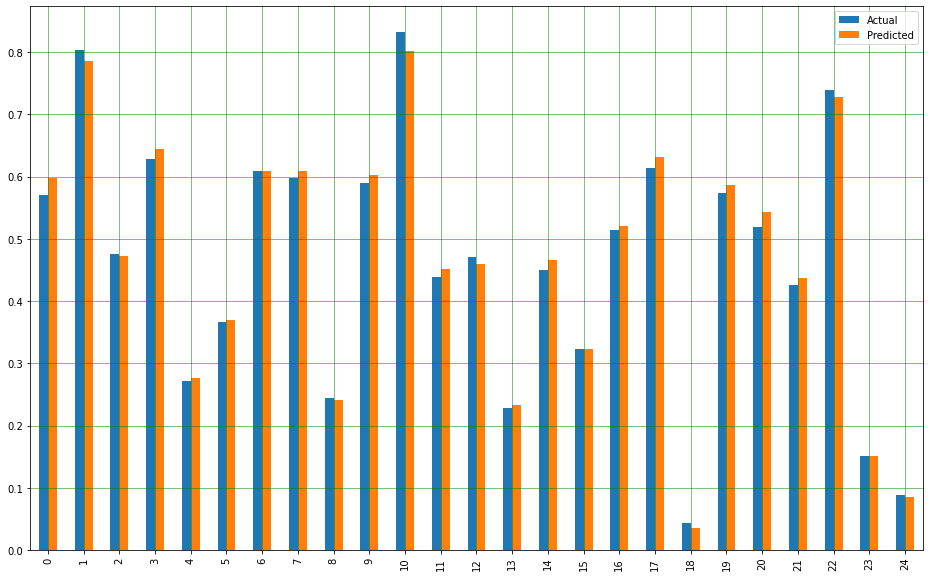

In [16]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Đưa ra độ chính xác của model
Model dự đoán tốt vì giá trị Mean Squared Error xấp xỉ 0.00015

In [17]:
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_prediction))
print('Train: ', metrics.r2_score(y_train, train_prediction))
print('Test: ', metrics.r2_score(y_test, test_prediction))

Mean Squared Error: 0.0001450033216579514
Train:  0.9975991787245336
Test:  0.9975662914253263


In ra các giá trị w1 và w0 tương ứng

In [18]:
print(model.coef_)
print(model.intercept_)

[[8.45574602e-08]]
[-0.01587872]
